# Prediction using decision tree 

The task is to classify Iris flowers according to their <code>Sepal Length</code>, <code>Sepal Width</code>, <code>Petal Length</code>, and <code>Petal Width</code> into three species of: <code>Setosa</code>, <code>versicolor</code>, and <code>virginica</code>.

Decision tree is used for classification and prediction of new unseen data.

### By: ZaraPhCode

Lets import required libraries:

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

Loading the dataset and displaying first few items:

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


We have an extra column which not help us for the classification task. Lets omit it:

In [3]:
df = df.drop(columns =["Id"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Importing required libraries for learning:

In [4]:
%matplotlib inline
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

RANDOM_STATE = 55

Sparcing the features and labels and then splitting the dataset into train and test sets:

In [5]:
X = df.drop(columns = ["Species"])
y = df['Species']
x_train, x_test,y_train, y_test = train_test_split(X ,y ,test_size = 0.3 ,random_state = RANDOM_STATE)

## Training the tree

In [6]:
model_tree = DecisionTreeClassifier(max_depth=3)
model_tree.fit(X, y)

DecisionTreeClassifier(max_depth=3)

## Model Analysis

Checking the accuracy for the training and test datasets:

In [7]:
print(f"Decision Tree Metrics train:\n\tAccuracy score: {accuracy_score(model_tree.predict(x_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(model_tree.predict(x_test),y_test):.4f}")

Decision Tree Metrics train:
	Accuracy score: 0.9810
Metrics test:
	Accuracy score: 0.9556


## Plotting the tree:

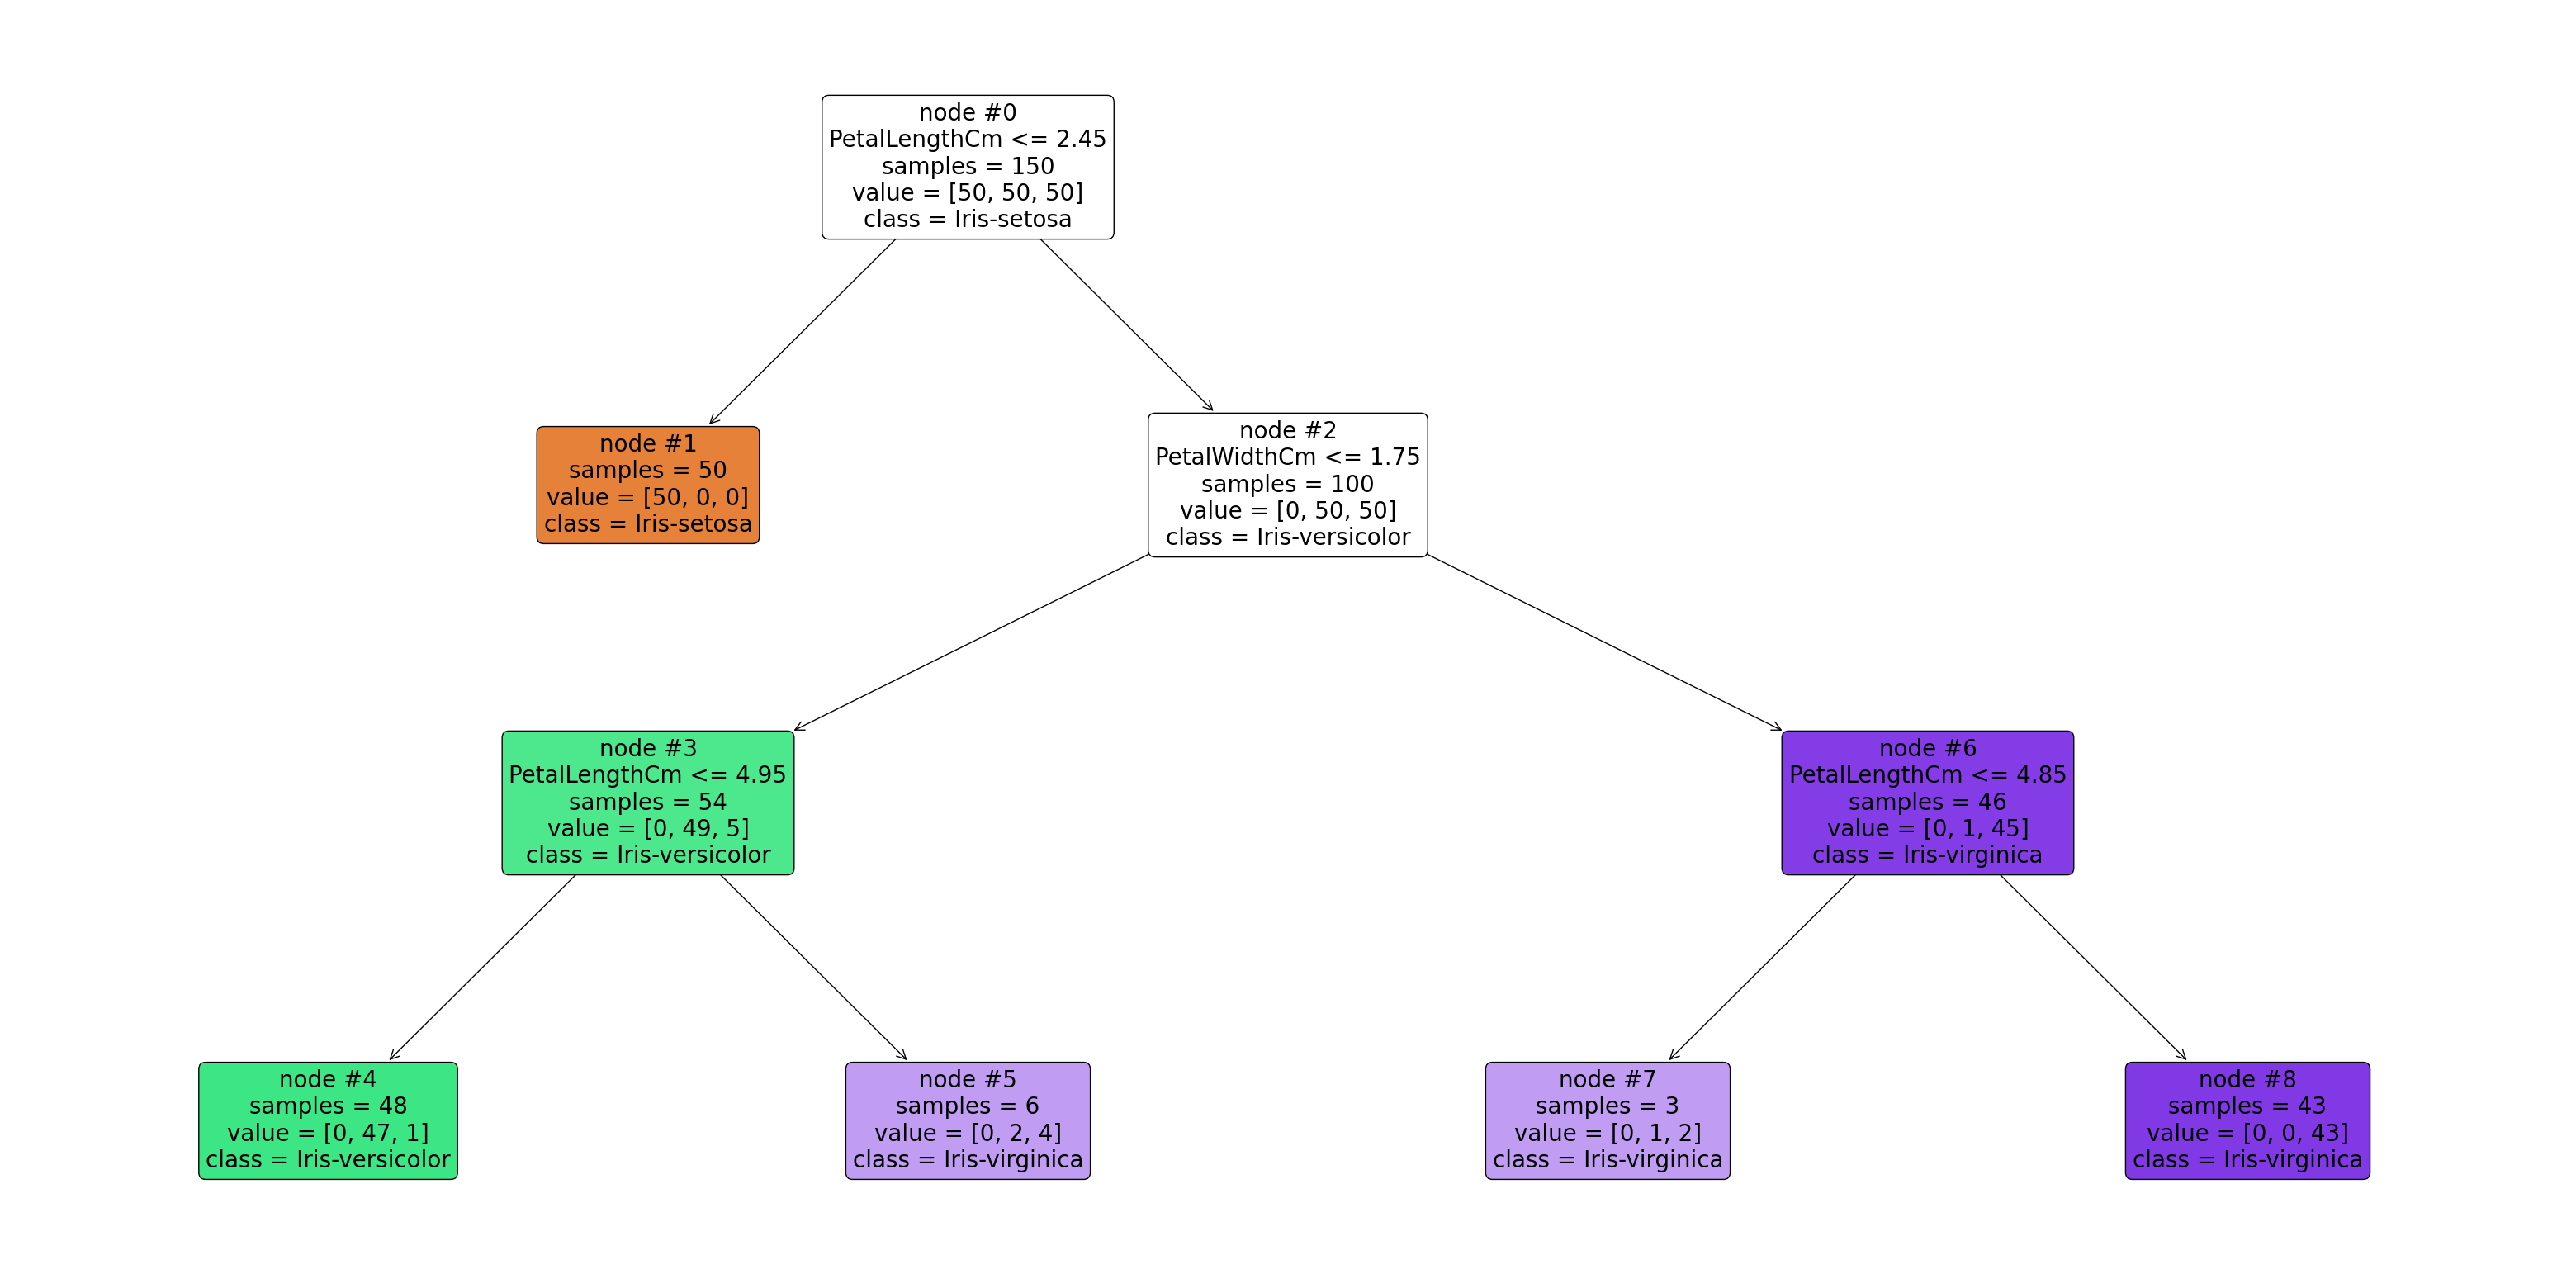

In [8]:
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = plot_tree(model_tree,
                   feature_names = list(X.columns.values),
                   class_names=np.unique(y),filled=True,
                   node_ids=True,
                   impurity=False,
                   label="all",
                   fontsize=20, rounded = True)
plt.show()

## Prediction for new data:

Lets predict the species of the first data in the test dataset:

In [27]:
data_num = 3   #you can change this number to see the prediction for each data in the test set
print('Prediction for the new data is:', model_tree.predict(x_test[data_num:data_num+1]))
print('Actual label for the new data is:' , y_test[data_num:data_num+1].iloc[0])

Prediction for the new data is: ['Iris-virginica']
Actual label for the new data is: Iris-virginica
